<a href="https://colab.research.google.com/github/JuanFelipeOrdonez/Procesamiento-digital-de-senales/blob/main/PDS_Basic_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

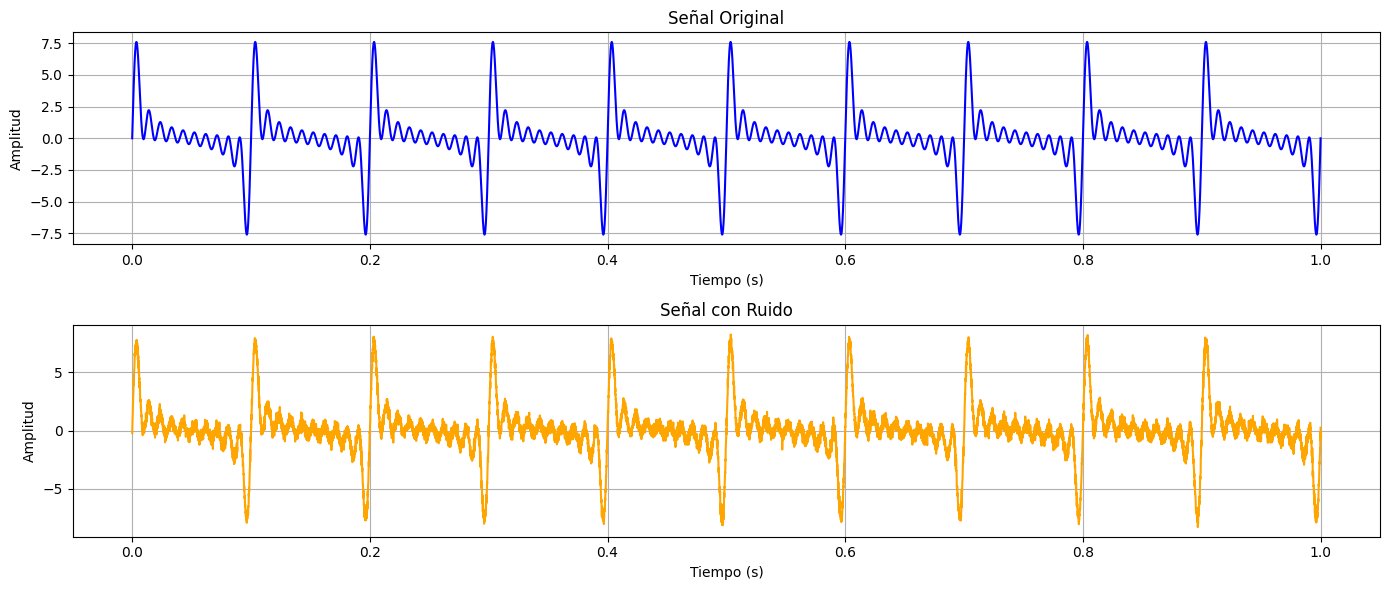

In [ ]:
# Importación de bibliotecas necesarias para cálculos numéricos, manipulación de datos y visualización
import numpy as np  # Biblioteca para cálculos numéricos y manejo de arreglos
import scipy as sp  # Biblioteca científica (no se usa directamente en este código)
from scipy.fft import fft, fftfreq, ifft  # Importación de herramientas para análisis de Fourier (no utilizadas aquí)
from matplotlib import pyplot as plt  # Biblioteca para generar gráficos

# Definición de la función para generar una señal compuesta por múltiples ondas sinusoidales
def signal(t, f):
    """
    Genera una señal como la suma de varias ondas sinusoidales.

    Parámetros:
    t (array): Vector de tiempo.
    f (list): Lista de frecuencias para construir la señal.

    Retorna:
    y (array): Señal compuesta de las frecuencias especificadas.
    """
    y = np.zeros(len(t))  # Inicializa la señal con ceros
    for i in f:  # Itera sobre cada frecuencia en la lista
        y += np.sin(2 * np.pi * i * t)  # Suma la componente sinusoidal correspondiente
    return y

# Configuración del número de muestras para el dominio temporal
Nsamples = 10000  # Número de puntos de muestreo
# Generación de ruido aleatorio con distribución normal (media 0, desviación estándar 1)
noise = np.random.normal(0, 1, Nsamples + 1)

# Definición del vector de tiempo y las frecuencias para la señal
t = np.linspace(0, 1, Nsamples + 1)  # Vector de tiempo uniformemente distribuido entre 0 y 1 segundo
f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Lista de frecuencias en Hz

# Generación de la señal original y la señal con ruido
y = signal(t, f)  # Señal compuesta por las frecuencias definidas
y_noise = y + 0.3 * noise  # Señal compuesta con ruido añadido (amplitud de ruido escalada por 0.3)

# Visualización de la señal original y la señal con ruido en una figura consolidada
plt.figure(figsize=(14, 6))  # Configuración del tamaño de la figura

# Subgráfico para la señal original
plt.subplot(2, 1, 1)  # Configura un subgráfico en la primera posición
plt.plot(t, y, color="blue")  # Grafica la señal original en color azul
plt.title("Señal Original")  # Título del gráfico
plt.xlabel("Tiempo (s)")  # Etiqueta del eje X
plt.ylabel("Amplitud")  # Etiqueta del eje Y
plt.grid(True)  # Añade una cuadrícula al gráfico

# Subgráfico para la señal con ruido
plt.subplot(2, 1, 2)  # Configura un subgráfico en la segunda posición
plt.plot(t, y_noise, color="orange")  # Grafica la señal con ruido en color naranja
plt.title("Señal con Ruido")  # Título del gráfico
plt.xlabel("Tiempo (s)")  # Etiqueta del eje X
plt.ylabel("Amplitud")  # Etiqueta del eje Y
plt.grid(True)  # Añade una cuadrícula al gráfico

plt.tight_layout()  # Ajusta el diseño para evitar superposición entre subgráficos
plt.show()  # Muestra los gráfico

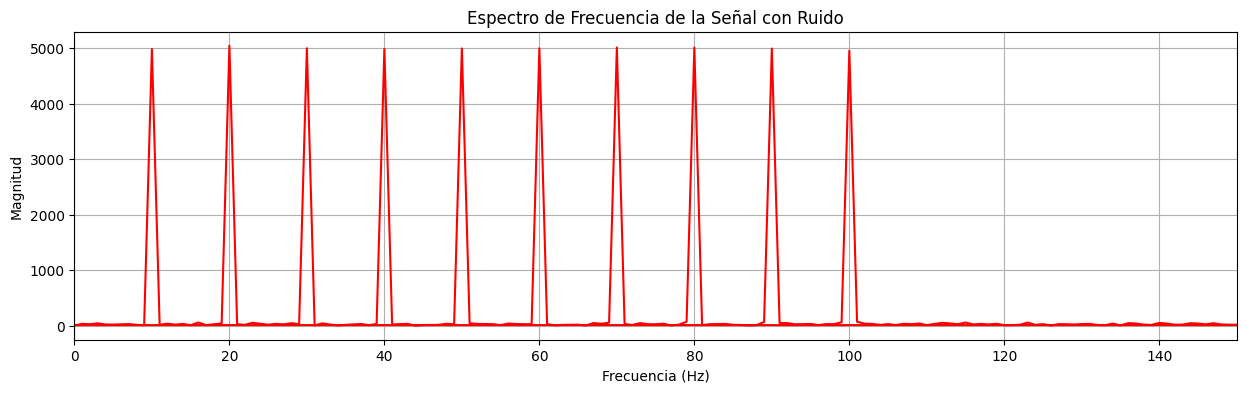

In [ ]:
# Realiza la Transformada Rápida de Fourier (FFT) de la señal con ruido
freq_spec = fft(y_noise)
# La FFT convierte la señal del dominio temporal al dominio frecuencial,
# devolviendo la amplitud y fase de las componentes de frecuencia.

# Calcula las frecuencias correspondientes a cada punto de la FFT
freq_freq = fftfreq(len(y_noise), t[1] - t[0])
# fftfreq genera un array de frecuencias basado en el tamaño de la señal (número de muestras)
# y el intervalo de muestreo (t[1] - t[0]).

# Configuración del gráfico para visualizar el espectro de frecuencias
plt.figure(figsize=(15,4), dpi=100)  # Crea una figura de tamaño 12x8 pulgadas con resolución de 100 dpi
plt.plot(freq_freq, np.abs(freq_spec), color = 'red')  # Grafica la magnitud del espectro (valores absolutos de la FFT)
plt.xlim(0, 150)  # Limita el eje X para mostrar frecuencias de 0 a 150 Hz
plt.grid()  # Añade una cuadrícula para facilitar la lectura del gráfico
plt.title("Espectro de Frecuencia de la Señal con Ruido")  # Título del gráfico
plt.xlabel("Frecuencia (Hz)")  # Etiqueta del eje X
plt.ylabel("Magnitud")  # Etiqueta del eje Y
plt.show()  # Muestra el gráfico

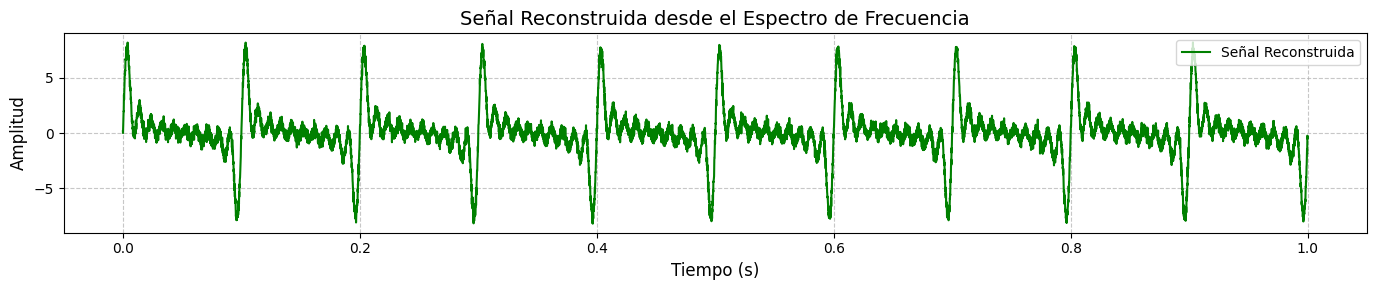

In [ ]:
# Realiza la Transformada Inversa Rápida de Fourier (IFFT) de la señal en el dominio frecuencial
freq_spec_inv = ifft(freq_spec)
# La IFFT convierte la señal del dominio frecuencial de regreso al dominio temporal.
# Nota: La señal reconstruida es compleja debido a la naturaleza de la IFFT,
# pero aquí solo se usará la parte real para graficar.

# Configuración del gráfico para visualizar la señal reconstruida
plt.figure(figsize=(14, 3), dpi=100)  # Crea una figura con tamaño 12x8 pulgadas y resolución de 100 dpi
plt.plot(t[:len(freq_spec_inv)], np.real(freq_spec_inv), color="green", label="Señal Reconstruida")
# Grafica la parte real de la señal reconstruida contra el tiempo
# Nota: Se ajusta el rango del tiempo a la longitud de la señal reconstruida.

plt.title("Señal Reconstruida desde el Espectro de Frecuencia", fontsize=14)  # Título descriptivo
plt.xlabel("Tiempo (s)", fontsize=12)  # Etiqueta del eje X
plt.ylabel("Amplitud", fontsize=12)  # Etiqueta del eje Y
plt.grid(True, linestyle="--", alpha=0.7)  # Añade una cuadrícula con estilo suave
plt.legend()  # Añade una leyenda para identificar la curva
plt.tight_layout()  # Ajusta los márgenes automáticamente para evitar solapamientos
plt.show()  # Muestra el gráfico


In [ ]:
# Generación del filtro tipo pulso usando la resta de dos escalones
filter_pulse = np.heaviside(freq_freq - 50, 1) - np.heaviside(freq_freq - 100, 1)
# Pulso rectangular definido entre 50 y 100 Hz

# Aplicación del filtro en el dominio de la frecuencia
filtered_freq_spec = freq_spec * filter_pulse  # Multiplica el espectro original por el filtro

# Transformada inversa para volver al dominio temporal
filtered_signal = ifft(filtered_freq_spec)  # Señal filtrada en el dominio temporal

# Visualización de resultados
plt.figure(figsize=(14, 8))  # Configuración del tamaño de la figura

# Subgráfico 1: Espectro de frecuencias original
plt.subplot(4, 1, 1)
plt.plot(freq_freq, np.abs(freq_spec), color="blue")
plt.title("Espectro de Frecuencia de la Señal con Ruido")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 150)  # Limita el rango de frecuencias para enfocarse en las relevantes
plt.grid(True)

# Subgráfico 2: Filtro en el dominio de la frecuencia
plt.subplot(4, 1, 2)
plt.plot(freq_freq, filter_pulse, color="green")
plt.title("Filtro en el Dominio de la Frecuencia (Pulso de 50 a 100 Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 150)
plt.grid(True)

# Subgráfico 3: Espectro de frecuencias filtrado
plt.subplot(4, 1, 3)
plt.plot(freq_freq, np.abs(filtered_freq_spec), color="purple")
plt.title("Espectro de Frecuencia Filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 150)
plt.grid(True)

# Subgráfico 4: Señal filtrada en el dominio temporal
plt.subplot(4, 1, 4)
plt.plot(t, np.real(filtered_signal), color="orange")
plt.title("Señal Filtrada en el Dominio Temporal")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()  # Ajusta los márgenes entre subgráficos
plt.show()  # Muestra los gráficos